# Intro to Regression
We're going through a few regression exercises that will help you see how regression works in Python.

<img src="./imgs/regression_ml.png" />

 

## Objectives: 
At the end of this notebook the students should:
- Be able to visualize data
- Look for correlations and multicollinearity
- Understand how linear regression models work
- Interpret basic regression statistics like R^2
- Do basic feature engineering and selection to improve models


Be able to create linear regression in:
- [***statsmodels***](http://statsmodels.sourceforge.net/): a package mainly best at doing regressions with traditional R formula syntax
- [***scikit-learn***](http://scikit-learn.org/dev/index.html): This is the main machine learning package we'll be using throughout the course.  It has a multitude of machine learning algorithms and helpful machine learning pipeline tools.  sklearn has a tremendous amount of functionality, to get the most out of this course it will help to really explore the depth of the documentation on your own and watch as you understand more and more of the functionality as the course progresses.


Gain familiarity with the following:
- ***R formulas***: R formulas are a convenient way for encapsulating functional relationships for regressions
- [***seaborn***](http://stanford.edu/~mwaskom/software/seaborn/): We'll use seaborn for **visualization** as we go along
- [***Variable Preprocessing***](http://scikit-learn.org/dev/modules/preprocessing.html#preprocessing) with scikit-learn:  We'll be **"standardizing"** many of our variables to yield better model data.  We'll show how the "linear" models can be extended to basically any type of function by using functions of the different fields as the inputs to the linear model.

Motivate the approach of developing an optimal Machine Learning model, by way of Linear Regression 

## Data
We'll take a look at: [Car price predictor dataset](https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset)    
[subset of data here](https://github.com/julialintern/intro_to_machine_learning/tree/main/data)

# Setup
Try running the following imports and check that they all import successfully.  If they do not, install commands are given below. If necessary, at a command line window use `pip` to install the ones that are failing for you and then retry the imports.

In [2]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

## Installations (if necessary)

```` bash
conda install pandas numpy statsmodels seaborn scikit-learn
````

# Used Car Data
We will be working with US Used Car in order to predict **price** (!)
and to demonstrate a few basic features of ***statsmodels*** and ***seaborn*** and how they might be used in a data science workflow for regression.

The dataset includes numerous predictive features we can use to predict Used car prices.

Let's load the dataset in using ***pandas*** and take a look at it.  Here we use [***pandas.read_table***](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html) to load the data.

 <img src="./imgs/saab.png" />

In [3]:
import datetime as dt
pd.options.display.max_columns = 500

In [4]:
# Load data  
df=pd.read_csv('data/data_small_final.csv',index_col=0)

/var/folders/jn/625fnnbs1jg77y82ld96q65w0000gn/T/ipykernel_5500/2083726088.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data/data_small_final.csv',index_col=0)


In [5]:
df.head()

,vin,city_fuel_economy,daysonmarket,dealer_zip,engine_cylinders,engine_displacement,engine_type,franchise_dealer,franchise_make,fuel_type,has_accidents,highway_fuel_economy,horsepower,is_new,is_oemcpo,latitude,length,listed_date,longitude,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,torque,transmission,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
1295044,1GAZG1FGXF1182508,11.0,33,68005,V8 Flex Fuel Vehicle,6000.0,V8 Flex Fuel Vehicle,True,Nissan,Flex Fuel Vehicle,False,16.0,342.0,False,NaN,41.1836,244.1 in,2020-08-08,-95.9359,Chevrolet,15 seats,44491.0,Express,2.0,"342 hp @ 5,400 RPM",20785.0,False,1938,4.750000,"373 lb-ft @ 4,400 RPM",A,NaN,RWD,Rear-Wheel Drive,155 in,79.2 in,2015
659921,JTJBM7FX0J5202882,15.0,7,44312,V8,4600.0,V8,True,Lexus,Gasoline,False,18.0,301.0,False,True,40.9790,192.1 in,2020-09-03,-81.4877,Lexus,7 seats,21487.0,GX,1.0,"301 hp @ 5,500 RPM",46995.0,False,250,4.500000,"329 lb-ft @ 3,500 RPM",A,NaN,AWD,All-Wheel Drive,109.8 in,74.2 in,2018
1097916,1FM5K8HC3LGA01518,18.0,369,30143,V6,3000.0,V6,True,Ford,Gasoline,NaN,24.0,365.0,True,NaN,34.4493,198.8 in,2019-09-07,-84.4483,Ford,7 seats,90.0,Explorer,NaN,NaN,52306.0,NaN,0,4.205882,NaN,A,NaN,AWD,All-Wheel Drive,119.1 in,89.3 in,2020
228002,YV4BR0DL3M1675891,NaN,12,6108,I4,2000.0,I4,True,Volvo,Gasoline,NaN,NaN,400.0,True,NaN,41.7701,184.6 in,2020-08-28,-72.6558,Volvo,5 seats,13.0,XC60,NaN,"400 hp @ 6,000 RPM",67625.0,NaN,0,4.578947,"472 lb-ft @ 2,200 RPM",A,NaN,AWD,All-Wheel Drive,112.8 in,83.3 in,2021
955081,JM3KFBEY5K0697516,22.0,8,25701,I4,2500.0,I4,True,Jeep,Gasoline,False,27.0,250.0,False,NaN,38.3950,179.1 in,2020-09-02,-82.4155,Mazda,5 seats,12437.0,CX-5,1.0,"250 hp @ 5,000 RPM",32985.0,False,877,4.625000,"310 lb-ft @ 2,000 RPM",A,NaN,AWD,All-Wheel Drive,106.2 in,83.3 in,2019


In [6]:
df.shape

(225000, 37)

In [7]:
df.describe()

,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,owner_count,price,savings_amount,seller_rating,vehicle_damage_category,year
count,188128.000000,225000.000000,212120.000000,188128.000000,212120.000000,225000.000000,225000.000000,2.140020e+05,111402.000000,2.250000e+05,225000.000000,222014.000000,0.0,225000.000000
mean,22.711000,75.668382,2966.873468,29.487057,247.763455,36.979490,-90.666080,3.121943e+04,1.533375,2.989133e+04,551.637662,4.270687,NaN,2017.734876
std,8.798542,109.152262,1350.378436,7.769239,90.281676,4.986773,13.907174,4.556432e+04,0.925868,1.970399e+04,1063.528282,0.512163,NaN,4.129016
min,8.000000,0.000000,700.000000,10.000000,70.000000,18.398800,-157.902000,0.000000e+00,1.000000,4.840000e+02,0.000000,1.000000,NaN,1927.000000
25%,18.000000,14.000000,2000.000000,25.000000,175.000000,33.509400,-97.088200,6.000000e+00,1.000000,1.843800e+04,0.000000,4.000000,NaN,2017.000000
50%,21.000000,35.000000,2500.000000,29.000000,243.000000,37.818500,-87.276400,8.541000e+03,1.000000,2.639500e+04,0.000000,4.337838,NaN,2020.000000
75%,26.000000,81.000000,3600.000000,33.000000,300.000000,40.981700,-80.491600,4.374875e+04,2.000000,3.811700e+04,785.000000,4.600000,NaN,2020.000000
max,127.000000,2976.000000,8400.000000,127.000000,808.000000,61.161800,-66.078500,1.111111e+06,19.000000,2.698500e+06,68745.000000,5.000000,NaN,2021.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225000 entries, 1295044 to 213979
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   vin                      225000 non-null  object 
 1   city_fuel_economy        188128 non-null  float64
 2   daysonmarket             225000 non-null  int64  
 3   dealer_zip               225000 non-null  object 
 4   engine_cylinders         217552 non-null  object 
 5   engine_displacement      212120 non-null  float64
 6   engine_type              217552 non-null  object 
 7   franchise_dealer         225000 non-null  bool   
 8   franchise_make           182141 non-null  object 
 9   fuel_type                218846 non-null  object 
 10  has_accidents            118023 non-null  object 
 11  highway_fuel_economy     188128 non-null  float64
 12  horsepower               212120 non-null  float64
 13  is_new                   225000 non-null  bool   
 14

In [9]:
df.describe(include='object')

,vin,dealer_zip,engine_cylinders,engine_type,franchise_make,fuel_type,has_accidents,is_oemcpo,length,listed_date,make_name,maximum_seating,model_name,power,salvage,torque,transmission,wheel_system,wheel_system_display,wheelbase,width
count,225000,225000,217552,217552,182141,218846,118023,10104,213158,225000,225000,213158,225000,188747,118023,186101,220115,214020,214020,213158,213158
unique,224999,13753,31,31,48,7,2,1,758,1054,69,12,1032,1570,2,1538,4,5,5,440,271
top,2T3F1RFV7KW018380,77477,I4,I4,Ford,Gasoline,False,True,231.9 in,2020-09-03,Ford,5 seats,F-150,"355 hp @ 5,600 RPM",False,"383 lb-ft @ 4,100 RPM",A,FWD,Front-Wheel Drive,106.3 in,72.4 in
freq,2,326,106515,106515,29606,194850,99570,10104,7248,5813,35603,140688,9519,6627,117204,6627,181323,94894,94894,14564,10045


In [10]:
df.shape

(225000, 37)

### Step # 1 )  Basic Data Cleaning

In [11]:
df.vin.value_counts().head()

2T3F1RFV7KW018380    2
1GAZG1FGXF1182508    1
2HKRW2H94LH648954    1
5UX2V1C03L9B97629    1
1J4GW48N54C357340    1
Name: vin, dtype: int64

In [12]:
df=df.drop_duplicates()
len(df)

224999

In [13]:
df.set_index('vin',inplace=True)

In [14]:
df.head()

,city_fuel_economy,daysonmarket,dealer_zip,engine_cylinders,engine_displacement,engine_type,franchise_dealer,franchise_make,fuel_type,has_accidents,highway_fuel_economy,horsepower,is_new,is_oemcpo,latitude,length,listed_date,longitude,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,torque,transmission,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
vin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1GAZG1FGXF1182508,11.0,33,68005,V8 Flex Fuel Vehicle,6000.0,V8 Flex Fuel Vehicle,True,Nissan,Flex Fuel Vehicle,False,16.0,342.0,False,NaN,41.1836,244.1 in,2020-08-08,-95.9359,Chevrolet,15 seats,44491.0,Express,2.0,"342 hp @ 5,400 RPM",20785.0,False,1938,4.750000,"373 lb-ft @ 4,400 RPM",A,NaN,RWD,Rear-Wheel Drive,155 in,79.2 in,2015
JTJBM7FX0J5202882,15.0,7,44312,V8,4600.0,V8,True,Lexus,Gasoline,False,18.0,301.0,False,True,40.9790,192.1 in,2020-09-03,-81.4877,Lexus,7 seats,21487.0,GX,1.0,"301 hp @ 5,500 RPM",46995.0,False,250,4.500000,"329 lb-ft @ 3,500 RPM",A,NaN,AWD,All-Wheel Drive,109.8 in,74.2 in,2018
1FM5K8HC3LGA01518,18.0,369,30143,V6,3000.0,V6,True,Ford,Gasoline,NaN,24.0,365.0,True,NaN,34.4493,198.8 in,2019-09-07,-84.4483,Ford,7 seats,90.0,Explorer,NaN,NaN,52306.0,NaN,0,4.205882,NaN,A,NaN,AWD,All-Wheel Drive,119.1 in,89.3 in,2020
YV4BR0DL3M1675891,NaN,12,6108,I4,2000.0,I4,True,Volvo,Gasoline,NaN,NaN,400.0,True,NaN,41.7701,184.6 in,2020-08-28,-72.6558,Volvo,5 seats,13.0,XC60,NaN,"400 hp @ 6,000 RPM",67625.0,NaN,0,4.578947,"472 lb-ft @ 2,200 RPM",A,NaN,AWD,All-Wheel Drive,112.8 in,83.3 in,2021
JM3KFBEY5K0697516,22.0,8,25701,I4,2500.0,I4,True,Jeep,Gasoline,False,27.0,250.0,False,NaN,38.3950,179.1 in,2020-09-02,-82.4155,Mazda,5 seats,12437.0,CX-5,1.0,"250 hp @ 5,000 RPM",32985.0,False,877,4.625000,"310 lb-ft @ 2,000 RPM",A,NaN,AWD,All-Wheel Drive,106.2 in,83.3 in,2019


### Step # 2 ) Drop object columns, 'id'  column (for now) 

In [15]:
## Let's start off by only using numerical vals 
num_cols=df.dtypes[df.dtypes!='object'].index
df_num=df[num_cols]

for i in df_num.columns:
    print(i)

city_fuel_economy
daysonmarket
engine_displacement
franchise_dealer
highway_fuel_economy
horsepower
is_new
latitude
longitude
mileage
owner_count
price
savings_amount
seller_rating
vehicle_damage_category
year


In [16]:
df_num.describe()

,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,owner_count,price,savings_amount,seller_rating,vehicle_damage_category,year
count,188127.000000,224999.000000,212119.000000,188127.000000,212119.000000,224999.000000,224999.000000,2.140010e+05,111401.000000,2.249990e+05,224999.000000,222013.000000,0.0,224999.000000
mean,22.710988,75.668630,2966.875669,29.487038,247.763666,36.979442,-90.665961,3.121939e+04,1.533370,2.989135e+04,551.636745,4.270686,NaN,2017.734870
std,8.798563,109.152441,1350.381239,7.769255,90.281836,4.986730,13.907090,4.556442e+04,0.925871,1.970403e+04,1063.530557,0.512164,NaN,4.129025
min,8.000000,0.000000,700.000000,10.000000,70.000000,18.398800,-157.902000,0.000000e+00,1.000000,4.840000e+02,0.000000,1.000000,NaN,1927.000000
25%,18.000000,14.000000,2000.000000,25.000000,175.000000,33.509400,-97.088200,6.000000e+00,1.000000,1.843800e+04,0.000000,4.000000,NaN,2017.000000
50%,21.000000,35.000000,2500.000000,29.000000,243.000000,37.818500,-87.276400,8.541000e+03,1.000000,2.639500e+04,0.000000,4.337838,NaN,2020.000000
75%,26.000000,81.000000,3600.000000,33.000000,300.000000,40.981700,-80.491600,4.374900e+04,2.000000,3.811700e+04,785.000000,4.600000,NaN,2020.000000
max,127.000000,2976.000000,8400.000000,127.000000,808.000000,61.161800,-66.078500,1.111111e+06,19.000000,2.698500e+06,68745.000000,5.000000,NaN,2021.000000


In [17]:
df_num=df_num.drop(columns='vehicle_damage_category',axis=1)

In [18]:
# Do some shifting, so that price is all the way to the left
new_col_list=list(df_num.columns[-4:])
new_col_list.extend(df_num.columns[:-4])

# How many rows and columns does the dataset have?
df_num=df_num[new_col_list]

In [19]:
pd.set_option('display.max_columns', 500)

df_num.describe()

,price,savings_amount,seller_rating,year,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,owner_count
count,2.249990e+05,224999.000000,222013.000000,224999.000000,188127.000000,224999.000000,212119.000000,188127.000000,212119.000000,224999.000000,224999.000000,2.140010e+05,111401.000000
mean,2.989135e+04,551.636745,4.270686,2017.734870,22.710988,75.668630,2966.875669,29.487038,247.763666,36.979442,-90.665961,3.121939e+04,1.533370
std,1.970403e+04,1063.530557,0.512164,4.129025,8.798563,109.152441,1350.381239,7.769255,90.281836,4.986730,13.907090,4.556442e+04,0.925871
min,4.840000e+02,0.000000,1.000000,1927.000000,8.000000,0.000000,700.000000,10.000000,70.000000,18.398800,-157.902000,0.000000e+00,1.000000
25%,1.843800e+04,0.000000,4.000000,2017.000000,18.000000,14.000000,2000.000000,25.000000,175.000000,33.509400,-97.088200,6.000000e+00,1.000000
50%,2.639500e+04,0.000000,4.337838,2020.000000,21.000000,35.000000,2500.000000,29.000000,243.000000,37.818500,-87.276400,8.541000e+03,1.000000
75%,3.811700e+04,785.000000,4.600000,2020.000000,26.000000,81.000000,3600.000000,33.000000,300.000000,40.981700,-80.491600,4.374900e+04,2.000000
max,2.698500e+06,68745.000000,5.000000,2021.000000,127.000000,2976.000000,8400.000000,127.000000,808.000000,61.161800,-66.078500,1.111111e+06,19.000000


### Step #3 : Perform Initial EDA

### Without EDA we are .. 

<img src="./imgs/flying_blind.png" />


Remember that without conducting a proper EDA we are flying blind.   
Be curious about your data!    
What are the distributions? 

### Visualizing with Seaborn
We see that we have 14 predictive features along with our response variable of price.
What are the correlations between the predictive features & price? 

#### Let's make a nice plot of our Response variable .. 

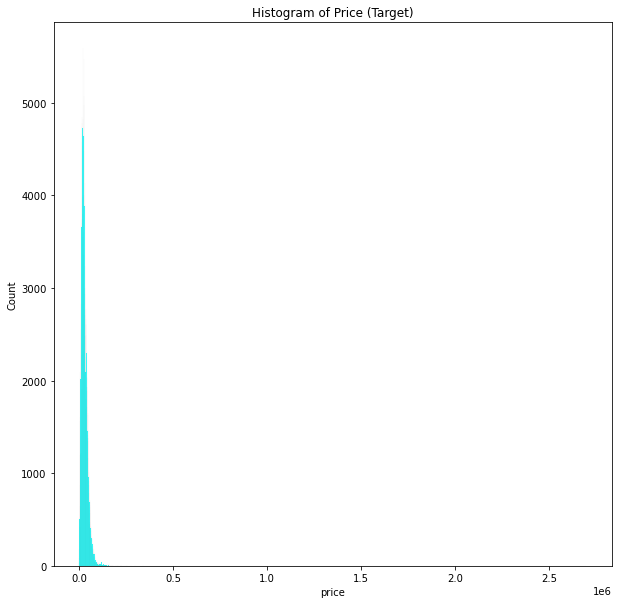

In [20]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.histplot(df_num.price,color='cyan')
plt.title('Histogram of Price (Target)');

## Ah. ..  the 'life is not fair distribution '

In [21]:
# View the correlations
df_num.corr()

,price,savings_amount,seller_rating,year,city_fuel_economy,daysonmarket,engine_displacement,franchise_dealer,highway_fuel_economy,horsepower,is_new,latitude,longitude,mileage,owner_count
price,1.000000,-0.003585,0.066876,0.359798,-0.171204,0.060551,0.366938,0.280687,-0.246068,0.586959,0.374732,-0.023490,-0.026367,-0.443932,-0.219786
savings_amount,-0.003585,1.000000,0.011980,-0.193109,-0.101944,-0.076525,0.139258,-0.211935,-0.095937,0.159770,-0.508199,-0.005055,-0.008541,0.247206,-0.071019
seller_rating,0.066876,0.011980,1.000000,-0.047229,-0.039744,-0.001001,0.031126,-0.037507,-0.050312,0.062569,-0.038027,0.092201,0.005155,0.036295,0.006693
year,0.359798,-0.193109,-0.047229,1.000000,0.156295,0.000406,-0.139161,0.496485,0.146759,0.029604,0.558924,-0.068497,-0.015741,-0.776629,-0.587181
city_fuel_economy,-0.171204,-0.101944,-0.039744,0.156295,1.000000,0.007042,-0.663647,0.059543,0.940855,-0.670930,0.100059,-0.039071,-0.085009,-0.151234,-0.126135
daysonmarket,0.060551,-0.076525,-0.001001,0.000406,0.007042,1.000000,-0.045479,0.003756,-0.001583,-0.020608,0.172803,0.020843,0.013578,-0.084527,0.097073
engine_displacement,0.366938,0.139258,0.031126,-0.139161,-0.663647,-0.045479,1.000000,-0.061573,-0.692354,0.831082,-0.067601,-0.006648,-0.008744,0.151741,0.118825
franchise_dealer,0.280687,-0.211935,-0.037507,0.496485,0.059543,0.003756,-0.061573,1.000000,0.043062,0.024797,0.471030,0.003389,0.014670,-0.517789,-0.265533
highway_fuel_economy,-0.246068,-0.095937,-0.050312,0.146759,0.940855,-0.001583,-0.692354,0.043062,1.000000,-0.703269,0.058137,-0.062287,-0.081188,-0.138088,-0.124240
horsepower,0.586959,0.159770,0.062569,0.029604,-0.670930,-0.020608,0.831082,0.024797,-0.703269,1.000000,0.008001,-0.013644,-0.012295,-0.013889,-0.000879


#### Correlation Map

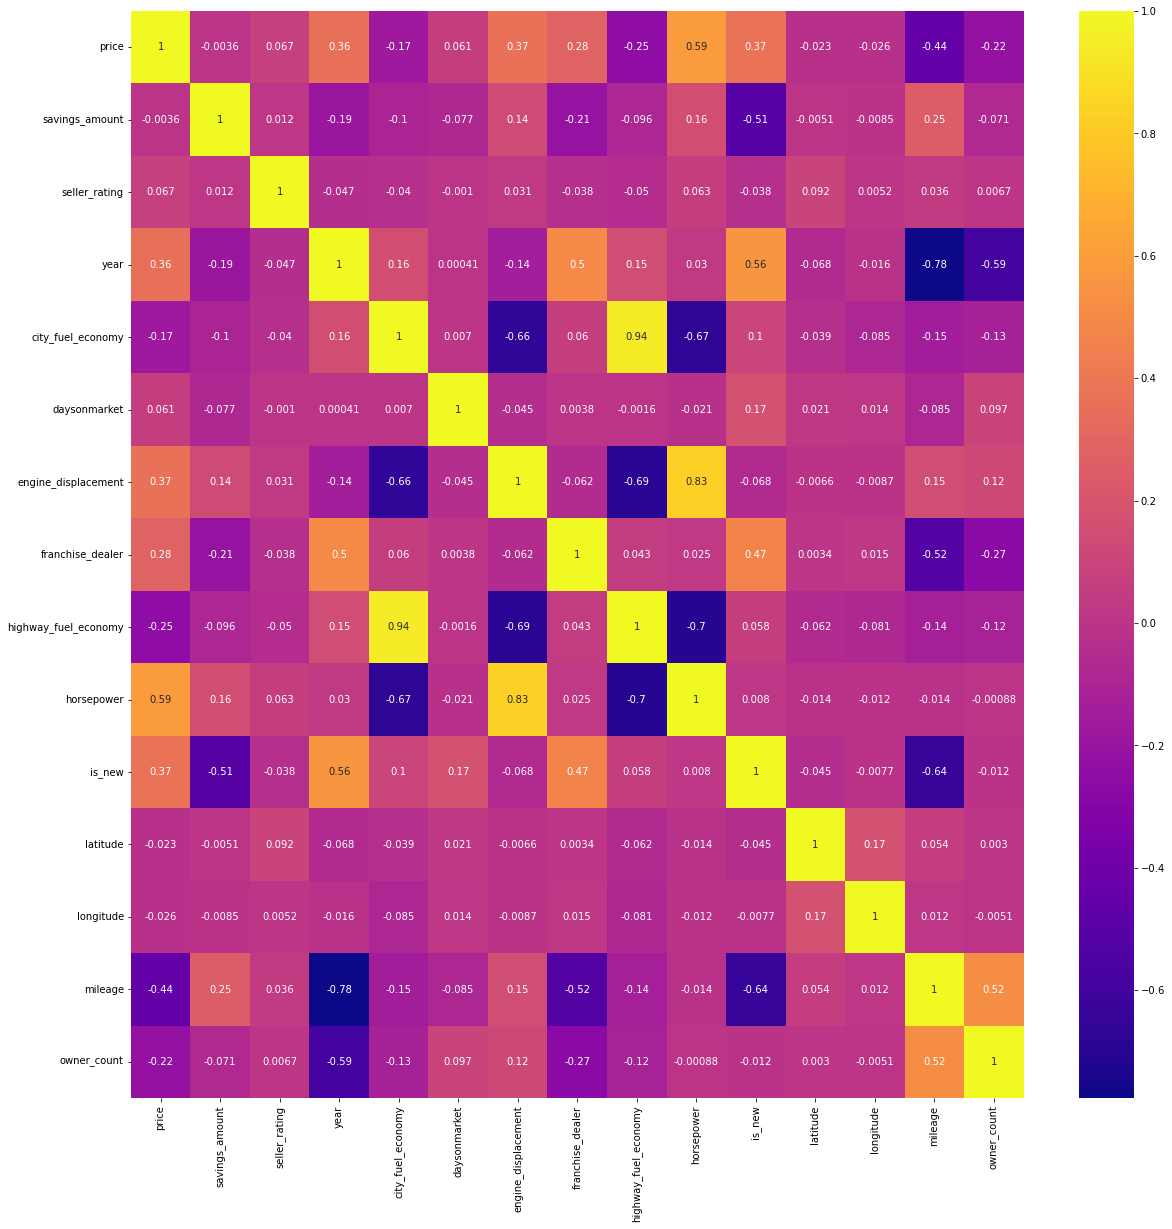

In [22]:
# example of a better corr matrix
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df_num.corr(), cmap="plasma", annot=True, ax=ax);
# more cmaps: https://matplotlib.org/examples/color/colormaps_reference.html

### Correlation and Multicollinearity
We notice that some of the variables are highly correlated.  This is something we might want to take into consideration later.  When 2 predictor variables are highly correlated this is called [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) and it is something we want to watch out for as it can destabilize our model.  In the extreme case, when 2 predictors are perfectly correlated then there is absolutely nothing gained by making both variables part of our regression.

The other takeaway from this table is that some of our predictors are highly correlated with our ***target variable Y***.  This is a good thing, it means that these are the variables that we most likely want to include as part of our model as they explain a large amount of the variance in the target variable (correlation=R, variance_explained=R<sup>2</sup>).

Let's try to visualize these correlations all together by using the [***seaborn pairplot***](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html) function.

> What do you notice?

> Almost all correlations are positive, somewhat normal distributions, etc.

In [23]:
# close-up on correlations with Price, what do you think? 
df_num.corr().iloc[0]

price                   1.000000
savings_amount         -0.003585
seller_rating           0.066876
year                    0.359798
city_fuel_economy      -0.171204
daysonmarket            0.060551
engine_displacement     0.366938
franchise_dealer        0.280687
highway_fuel_economy   -0.246068
horsepower              0.586959
is_new                  0.374732
latitude               -0.023490
longitude              -0.026367
mileage                -0.443932
owner_count            -0.219786
Name: price, dtype: float64

### Pairplot Map

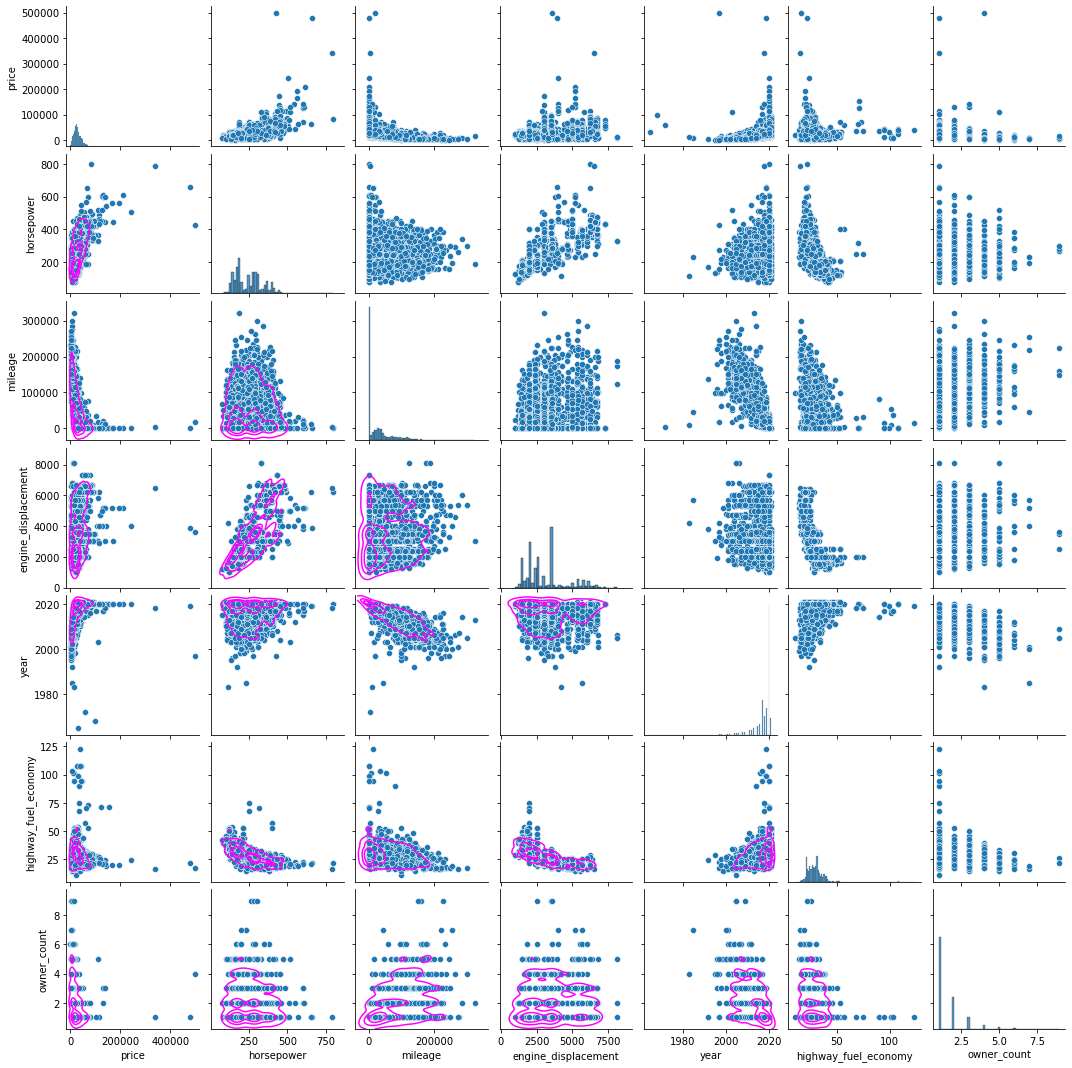

In [24]:
# Warning, takes 2 mins to run .. 
df_samp=df_num[['price','horsepower','mileage','engine_displacement','year','highway_fuel_economy','owner_count']].sample(5000)
g=sns.pairplot(df_samp,kind="scatter");
g.map_lower(sns.kdeplot, levels=4, color='magenta')
g.fig.set_size_inches(15,15)

### Ordinary Least Squares Regression with Statsmodels
Now that we have a feel for our data, let's jump right in and try a basic regression model.  

#### Statsmodels
We are going to use the [**`statsmodels`**](http://statsmodels.sourceforge.net/) library first.  `statsmodels` is a Python package for implementing [**linear models**](https://en.wikipedia.org/wiki/Linear_model), of which **Linear Regression** is one.  It has a bunch of nice features for evaluating and executing such models.  Essentially, a linear model is one that is a **linear function of the parameters**.  For Linear Regression, this means the parameter $\beta$ (note that here $\beta$ is a **vector** of parameters, which includes $\beta_0$, $\beta_1$, $\beta_2$, etc).  We'll discuss linear models generally later but for  now just accept that Linear Regression is one of these.

#### Modeling with Statsmodels
There are 2 main ways you can generate models with stats models:
- Via the `statsmodels.api` package
- Via the `statsmodels.formula.api` package

For both approaches, you'll need somewhere to use the R formula style formulas for defining the relationship between target variable and feature variables in your model.  ***Statsmodels*** uses [***patsy***](http://patsy.readthedocs.org/en/latest/) to convert this syntax into the proper data matrices for input into its linear models under the covers.  There are a variety of interactions and functions of variables that you can incorporate with this syntax, so feel free to check out the docs.

Here we'll just start by defining a regression model that takes as its inputs each of the *14* predictor variables.  The other parameter of course is the data that the model is to be built from, our pandas dataframe.

This first model fitting is done for you, it fits a multiple linear regression model of the following form (notice the use of [MathJax](https://www.mathjax.org/) for rendering such lovely math equations in markdown):

$$
\widehat{Y} = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5 + \beta_6X_6 +\beta_7X_7 + \beta_8X_8 + \beta_9X_9 + \beta_10X_{10} + \beta_11X_{11} + \beta_12X_{12} + \beta_13X_{13}
$$

##### `statsmodels.api`
To use this method, you need to generate a **matrix** of **features**, **`X`** and a **vector** of **targets**, **`y`** where each row represents a single **observation**.  In statsmodels, you can do this with a call to **`patsy.dmatrices`**:


How do we solve for the Betas ? 

<img src="https://www.gstatic.com/education/formulas2/443397389/en/ordinary_least_squares.svg" />

In [25]:
df_num.dtypes

price                   float64
savings_amount            int64
seller_rating           float64
year                      int64
city_fuel_economy       float64
daysonmarket              int64
engine_displacement     float64
franchise_dealer           bool
highway_fuel_economy    float64
horsepower              float64
is_new                     bool
latitude                float64
longitude               float64
mileage                 float64
owner_count             float64
dtype: object

In [26]:
# Create your feature matrix (X) and target vector (y)

y, X = patsy.dmatrices('price~city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_num)
# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     4706.
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:12:38   Log-Likelihood:            -1.0021e+06
No. Observations:               91458   AIC:                         2.004e+06
Df Residuals:                   91444   BIC:                         2.004e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1996.3277    820.428      2.433      0.015     388.297    3604.358
franchise_dealer[T.True]  1392.6182    102.799     13.547      0.000    1191.133    1594.103
is_new[T.True]            1.128e+04   1796.535      6.280      0.000    7761.941    1.48e+04
city_fuel_economy          610.3233     19.253     31.701      0.000     572.588     648.058
daysonmarket                -1.2045      0.493     -2.445      0.014      -2.170      -0.239
engine_displacement         -1.9853      0.078    -25.583      0.000      -2.137      -1.833
highway_fuel_economy      -561.9985     19.437    -28.914      0.000    -600.095    -523.902
horsepower                 115.3618      1.084    106.455      0.000     113.238     117.486
latitude                   -12.0308      9.600     -1.253      0.210     -30.846       6.784
longitude                   -9.1199      3.342     -2.729      0.006     -15.670      -2.570
mileage                     -0.1204      0.001    -92.058      0.000      -0.123      -0.118
owner_count               -398.6040     62.650     -6.362      0.000    -521.397    -275.811
savings_amount               2.1714      0.043     50.989      0.000       2.088       2.255
seller_rating             1114.5462     89.807     12.410      0.000     938.525    1290.567
==============================================================================
Omnibus:                   363406.277   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1112355645973.583
Skew:                          99.869   Prob(JB):                         0.00
Kurtosis:                   17086.896   Cond. No.                     2.82e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Some things to keep our eys on : 

* R^2, Adjusted R^2 
* Prob (F-statistic) 
* P-vals of Predictive features
* Jarque-Bera (JB)

##### `statsmodels.formula.api`
The formula approach handles the creation of the `X` and `y` matrices internally, so all you have to do is supply the R formula for your model when you create your `ols` object.  

**NOTE:** We'll use this for the remainder of these exercises, but many people like to stick with the `dmatrices` and `X`, `y` matrix creation approach because that is the way `sklearn` works (see later).  Notice that here we've built the same model and it's deterministic, so the results are the same.


In [27]:
# Define the model
lm1 = smf.ols('price~city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_num)
# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     4706.
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:12:39   Log-Likelihood:            -1.0021e+06
No. Observations:               91458   AIC:                         2.004e+06
Df Residuals:                   91444   BIC:                         2.004e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1996.3277    820.428      2.433      0.015     388.297    3604.358
franchise_dealer[T.True]  1392.6182    102.799     13.547      0.000    1191.133    1594.103
is_new[T.True]            1.128e+04   1796.535      6.280      0.000    7761.941    1.48e+04
city_fuel_economy          610.3233     19.253     31.701      0.000     572.588     648.058
daysonmarket                -1.2045      0.493     -2.445      0.014      -2.170      -0.239
engine_displacement         -1.9853      0.078    -25.583      0.000      -2.137      -1.833
highway_fuel_economy      -561.9985     19.437    -28.914      0.000    -600.095    -523.902
horsepower                 115.3618      1.084    106.455      0.000     113.238     117.486
latitude                   -12.0308      9.600     -1.253      0.210     -30.846       6.784
longitude                   -9.1199      3.342     -2.729      0.006     -15.670      -2.570
mileage                     -0.1204      0.001    -92.058      0.000      -0.123      -0.118
owner_count               -398.6040     62.650     -6.362      0.000    -521.397    -275.811
savings_amount               2.1714      0.043     50.989      0.000       2.088       2.255
seller_rating             1114.5462     89.807     12.410      0.000     938.525    1290.567
==============================================================================
Omnibus:                   363406.277   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1112355645973.583
Skew:                          99.869   Prob(JB):                         0.00
Kurtosis:                   17086.896   Cond. No.                     2.82e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Regression Statistics
From this we get a handful of useful statistics describing our regression.We will focus on the ***R<sup>2</sup>*** values and the middle table here.

$$R^2 = 1- (SSE/SST) $$ 

Where: 
$$ SSE= \sum_{s=i}(y_i-\hat{y}_i)^2$$ 

$$ SST= \sum_{s=i}(y_i-\bar{y})^2$$ 

<img src="./imgs/r_2.png" />

***Adjusted R<sup>2</sup>*** also penalizes for things such as large coefficients and extra variables to try and limit ***overfitting*** so it is often a better measure of model efficacy. We will want to use both ***R<sup>2</sup>*** and ***Adjusted R<sup>2</sup>*** 

<img src="./imgs/adjusted_r.png" />

The middle table provides the **coefficients** that our regression has found, along with the **standard error** for each coefficient. This defines our model, aka these are the model parameters that our algorithm was seeking to determine.  

The **t-scores** are values that the coefficients score in the [Student's T Distribution](https://en.wikipedia.org/wiki/Student's_t-distribution) and the **P>|t|** field represents the probability of finding such a t-score if the actual value of the coefficient were 0. In other words, if we had a coefficient whose true value should be 0 (aka the predictor has no impact on the response) then this P-value is the probability of finding such a coefficient value in our regression by random chance. In essence, it measures our degree of belief that the coefficient for each variable should be zero. Thus, the lowest P-values represent the most likely predictors to be impacting the response.

As we go along, we will discuss how a statistician might proceed with modeling vs how a die-hard machine learner might approach things,  Ultimately, you may want to try both approaches.  Here we'll start off with a statisitical approach. 

 TBD
[What is a baseline model?](https://datascience.stackexchange.com/questions/30912/what-does-baseline-mean-in-the-context-of-machine-learning)

### Step 5) Impute missing values

In [28]:
df_num=df_num.join(df[['model_name','make_name','engine_type','dealer_zip']])

In [29]:
df_num.describe()

,price,savings_amount,seller_rating,year,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,owner_count
count,2.249990e+05,224999.000000,222013.000000,224999.000000,188127.000000,224999.000000,212119.000000,188127.000000,212119.000000,224999.000000,224999.000000,2.140010e+05,111401.000000
mean,2.989135e+04,551.636745,4.270686,2017.734870,22.710988,75.668630,2966.875669,29.487038,247.763666,36.979442,-90.665961,3.121939e+04,1.533370
std,1.970403e+04,1063.530557,0.512164,4.129025,8.798563,109.152441,1350.381239,7.769255,90.281836,4.986730,13.907090,4.556442e+04,0.925871
min,4.840000e+02,0.000000,1.000000,1927.000000,8.000000,0.000000,700.000000,10.000000,70.000000,18.398800,-157.902000,0.000000e+00,1.000000
25%,1.843800e+04,0.000000,4.000000,2017.000000,18.000000,14.000000,2000.000000,25.000000,175.000000,33.509400,-97.088200,6.000000e+00,1.000000
50%,2.639500e+04,0.000000,4.337838,2020.000000,21.000000,35.000000,2500.000000,29.000000,243.000000,37.818500,-87.276400,8.541000e+03,1.000000
75%,3.811700e+04,785.000000,4.600000,2020.000000,26.000000,81.000000,3600.000000,33.000000,300.000000,40.981700,-80.491600,4.374900e+04,2.000000
max,2.698500e+06,68745.000000,5.000000,2021.000000,127.000000,2976.000000,8400.000000,127.000000,808.000000,61.161800,-66.078500,1.111111e+06,19.000000


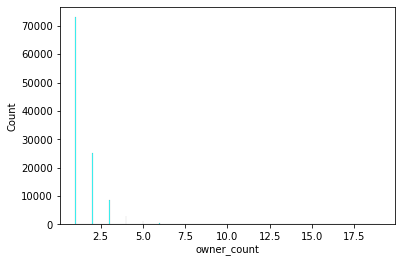

In [30]:
sns.histplot(df_num['owner_count'],color='cyan');

In [31]:
# start by imputing owner_count
df_impute=df_num.copy()
df_impute['owner_count']=df_impute['owner_count'].fillna(df_impute['owner_count'].median())
df_impute.describe()

,price,savings_amount,seller_rating,year,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,owner_count
count,2.249990e+05,224999.000000,222013.000000,224999.000000,188127.000000,224999.000000,212119.000000,188127.000000,212119.000000,224999.000000,224999.000000,2.140010e+05,224999.000000
mean,2.989135e+04,551.636745,4.270686,2017.734870,22.710988,75.668630,2966.875669,29.487038,247.763666,36.979442,-90.665961,3.121939e+04,1.264081
std,1.970403e+04,1063.530557,0.512164,4.129025,8.798563,109.152441,1350.381239,7.769255,90.281836,4.986730,13.907090,4.556442e+04,0.703950
min,4.840000e+02,0.000000,1.000000,1927.000000,8.000000,0.000000,700.000000,10.000000,70.000000,18.398800,-157.902000,0.000000e+00,1.000000
25%,1.843800e+04,0.000000,4.000000,2017.000000,18.000000,14.000000,2000.000000,25.000000,175.000000,33.509400,-97.088200,6.000000e+00,1.000000
50%,2.639500e+04,0.000000,4.337838,2020.000000,21.000000,35.000000,2500.000000,29.000000,243.000000,37.818500,-87.276400,8.541000e+03,1.000000
75%,3.811700e+04,785.000000,4.600000,2020.000000,26.000000,81.000000,3600.000000,33.000000,300.000000,40.981700,-80.491600,4.374900e+04,1.000000
max,2.698500e+06,68745.000000,5.000000,2021.000000,127.000000,2976.000000,8400.000000,127.000000,808.000000,61.161800,-66.078500,1.111111e+06,19.000000


In [32]:
# .401  >> .553 for imputation of owner count
lm2 = smf.ols('price~city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_impute)

# Fit the model
fit2 = lm2.fit()

# Print summary statistics of the model's performance
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                 1.670e+04
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:12:40   Log-Likelihood:            -1.9044e+06
No. Observations:              175343   AIC:                         3.809e+06
Df Residuals:                  175329   BIC:                         3.809e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -7476.8439    536.509    -13.936      0.000   -8528.390   -6425.298
franchise_dealer[T.True]  1361.7013     91.704     14.849      0.000    1181.964    1541.439
is_new[T.True]            7557.5313     94.706     79.800      0.000    7371.910    7743.152
city_fuel_economy          558.1018     11.855     47.079      0.000     534.867     581.337
daysonmarket                 2.1279      0.292      7.284      0.000       1.555       2.700
engine_displacement         -3.0681      0.048    -63.648      0.000      -3.163      -2.974
highway_fuel_economy      -530.8121     12.686    -41.841      0.000    -555.677    -505.947
horsepower                 154.3439      0.690    223.704      0.000     152.992     155.696
latitude                    24.8198      6.244      3.975      0.000      12.582      37.057
longitude                  -13.8898      2.205     -6.299      0.000     -18.211      -9.568
mileage                     -0.1155      0.001   -101.546      0.000      -0.118      -0.113
owner_count               -523.6872     56.435     -9.279      0.000    -634.299    -413.076
savings_amount               1.6911      0.036     46.524      0.000       1.620       1.762
seller_rating             1568.6277     59.434     26.393      0.000    1452.138    1685.117
==============================================================================
Omnibus:                   625755.284   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1246359331948.346
Skew:                          71.330   Prob(JB):                         0.00
Kurtosis:                   13063.420   Cond. No.                     9.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Exercise

What other features could benefit from imputation of missing values?  
Can you impute in a smart way using the groupby function (note that we included 
some features : 'model_name','make_name','engine_type','dealer_zip') that we can use for the groupby. 

* Impute predictive feature values & confirm performance improvement on an iterative basis.
   Only if R^2 reflects improvement (or stays the same) , should the imputed version be retained

**Challenge** : create a function for imputation.  Perform imputation & performance improvement confirmation via a loop 

In [35]:
df_num.describe()

,price,savings_amount,seller_rating,year,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,owner_count
count,2.249990e+05,224999.000000,222013.000000,224999.000000,188127.000000,224999.000000,212119.000000,188127.000000,212119.000000,224999.000000,224999.000000,2.140010e+05,111401.000000
mean,2.989135e+04,551.636745,4.270686,2017.734870,22.710988,75.668630,2966.875669,29.487038,247.763666,36.979442,-90.665961,3.121939e+04,1.533370
std,1.970403e+04,1063.530557,0.512164,4.129025,8.798563,109.152441,1350.381239,7.769255,90.281836,4.986730,13.907090,4.556442e+04,0.925871
min,4.840000e+02,0.000000,1.000000,1927.000000,8.000000,0.000000,700.000000,10.000000,70.000000,18.398800,-157.902000,0.000000e+00,1.000000
25%,1.843800e+04,0.000000,4.000000,2017.000000,18.000000,14.000000,2000.000000,25.000000,175.000000,33.509400,-97.088200,6.000000e+00,1.000000
50%,2.639500e+04,0.000000,4.337838,2020.000000,21.000000,35.000000,2500.000000,29.000000,243.000000,37.818500,-87.276400,8.541000e+03,1.000000
75%,3.811700e+04,785.000000,4.600000,2020.000000,26.000000,81.000000,3600.000000,33.000000,300.000000,40.981700,-80.491600,4.374900e+04,2.000000
max,2.698500e+06,68745.000000,5.000000,2021.000000,127.000000,2976.000000,8400.000000,127.000000,808.000000,61.161800,-66.078500,1.111111e+06,19.000000


In [1]:
# TBD  ..  

### Linear Regression Assumptions

#### Classical Assumptions of Ordinary Least Squares

1. Regression is linear in parameters & correctly specified
2. The error terms are normally distributed and zero population mean
3. The error term has constant variance $Var({\epsilon_i})={\sigma^2}$ for every i (no heteroskedasticity)
4. Errors are uncorrelated across observations: $cov({\epsilon_i},{\epsilon_j})=0$ for two observations i and j (no serial correlation)
5. No independent variable is a perfect linear function of any other independent variable (no perfect multi-collinearity)



### Plotting Residuals
let's take a quick look at a plot of our residuals *(actual value - predicted value)* with this model.  We do this because in a good model we essentially want our errors to be random.  If our residuals look systematic (e.g. missing high for one range and low for another) then we probably are missing the actual functional dependency underlying the data (perhaps it's not really linear).

Take a look [here](http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit) for an example of a bad residual plot.

In [37]:
from scipy import stats
def diagnostic_plot(x,y,model):
    plt.figure(figsize=(12,6))
    
    try:
        pred=model.predict()
        res=model.resid
    except: 
        pred=model.predict(X)
        res=y-pred
        

    plt.subplot(1, 2, 1)
    res = y - pred
    plt.scatter(pred, res,alpha=.5)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 2, 2)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm",plot=plt)
    plt.title("Normal Q-Q plot")

#### Linear Regression Assumption #2 :   The error terms are normally distributed and zero population mean

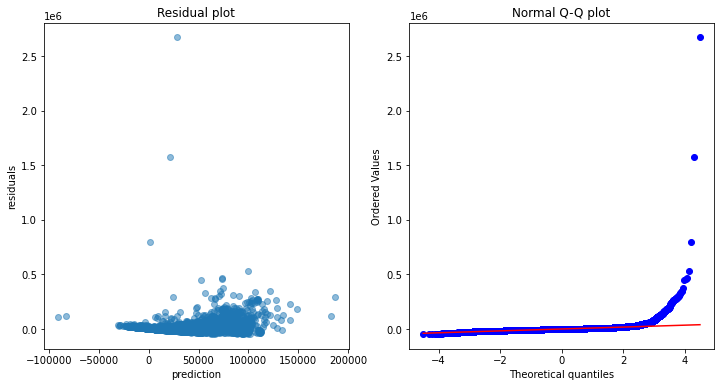

In [38]:
X=df_impute.drop(columns='price',axis=1)
y=df_impute.price
diagnostic_plot(X,y,fit3)

### Step 6) Drop Anomalous Data

In [39]:
### Remove significant outliers : 

df_impute.sort_values(by='price').tail(10)[['price','make_name','model_name','year']]

,price,make_name,model_name,year
vin,,,,
SCAFK4C05LU200593,450450.0,Rolls-Royce,Ghost,2020
ZFF90HLA3L0251028,470000.0,Ferrari,488,2020
ZFF90HLA0K0242740,479900.0,Ferrari,488,2019
WP0AC2999VS375762,499000.0,Porsche,911,1997
JTHHX8BH7C1000123,529000.0,Lexus,LFA,2012
SCA687S59KU104736,544500.0,Rolls-Royce,Phantom,2019
2FAGP9DW3LH100113,626340.0,Ford,GT,2020
1N4AL21E87N452332,799900.0,Nissan,Altima,2007
2C4RDGEGXHR681294,1599500.0,Dodge,Grand Caravan,2017


In [40]:
df_impute=df_impute[df_impute.price<625000]

In [41]:
# Dropping anomalous .. 
lm4 = smf.ols('price~city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_impute)

# Fit the model
fit4 = lm4.fit()

# Print summary statistics of the model's performance
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                 3.083e+04
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:41:27   Log-Likelihood:            -2.2086e+06
No. Observations:              207290   AIC:                         4.417e+06
Df Residuals:                  207276   BIC:                         4.417e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -8579.4825    396.214    -21.654      0.000   -9356.053   -7802.912
franchise_dealer[T.True]  1482.3423     69.657     21.280      0.000    1345.815    1618.869
is_new[T.True]            7341.8134     70.617    103.967      0.000    7203.406    7480.221
city_fuel_economy          564.1454      8.867     63.625      0.000     546.767     581.524
daysonmarket                 2.8812      0.217     13.298      0.000       2.457       3.306
engine_displacement         -3.4771      0.035    -98.728      0.000      -3.546      -3.408
highway_fuel_economy      -520.1492      9.400    -55.334      0.000    -538.573    -501.725
horsepower                 160.5720      0.507    316.510      0.000     159.578     161.566
latitude                    23.7206      4.649      5.102      0.000      14.609      32.832
longitude                  -15.6796      1.656     -9.468      0.000     -18.926     -12.434
mileage                     -0.1159      0.001   -138.735      0.000      -0.118      -0.114
owner_count               -396.7803     41.379     -9.589      0.000    -477.883    -315.678
savings_amount               1.7295      0.027     64.491      0.000       1.677       1.782
seller_rating             1565.0139     44.401     35.247      0.000    1477.988    1652.039
==============================================================================
Omnibus:                   296442.923   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        343156120.406
Skew:                           8.062   Prob(JB):                         0.00
Kurtosis:                     201.672   Cond. No.                     9.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

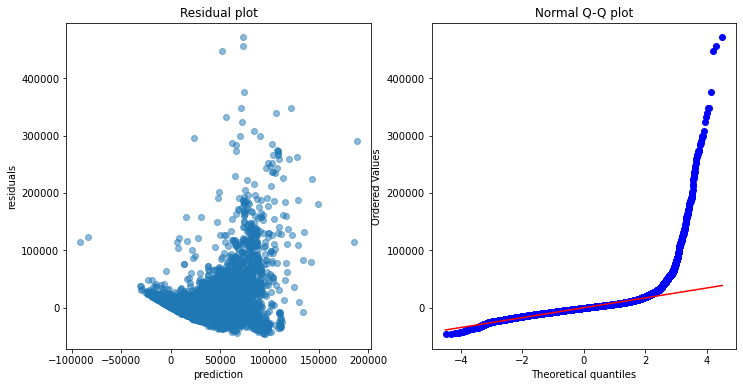

In [42]:
y=df_impute.price
X=df_impute.drop(columns=['price'],axis=1)
diagnostic_plot(X,y,fit4);

### Step 7) Try a Log Transformation

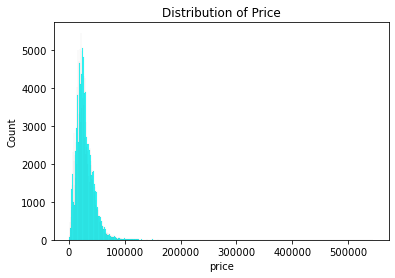

In [43]:
sns.histplot(df_impute['price'],color='cyan',alpha=.8);
plt.title('Distribution of Price');

/var/folders/jn/625fnnbs1jg77y82ld96q65w0000gn/T/ipykernel_1943/3404750999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impute['logged_price']=np.log(df_impute.price)


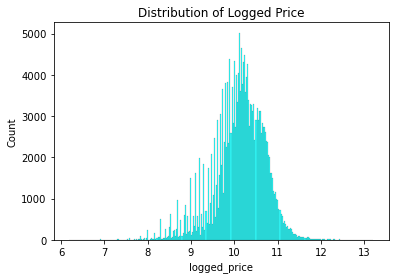

In [44]:
# Try log transform of response variable : 
df_impute['logged_price']=np.log(df_impute.price)
sns.histplot(df_impute['logged_price'],color='cyan',alpha=.8);
plt.title('Distribution of Logged Price');

In [45]:
## try using log Transformed version of Price 
lm5 = smf.ols('logged_price~city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_impute)

# Fit the model
fit5 = lm5.fit()

# Print summary statistics of the model's performance
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logged_price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                 7.826e+04
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:41:29   Log-Likelihood:                 1257.9
No. Observations:              207290   AIC:                            -2488.
Df Residuals:                  207276   BIC:                            -2344.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    9.3601      0.009   1007.407      0.000       9.342       9.378
franchise_dealer[T.True]     0.1016      0.002     62.206      0.000       0.098       0.105
is_new[T.True]               0.1190      0.002     71.871      0.000       0.116       0.122
city_fuel_economy            0.0206      0.000     99.022      0.000       0.020       0.021
daysonmarket             -7.054e-05   5.08e-06    -13.885      0.000   -8.05e-05   -6.06e-05
engine_displacement      -6.553e-05   8.26e-07    -79.342      0.000   -6.71e-05   -6.39e-05
highway_fuel_economy        -0.0229      0.000   -103.736      0.000      -0.023      -0.022
horsepower                   0.0042   1.19e-05    349.980      0.000       0.004       0.004
latitude                     0.0013      0.000     11.682      0.000       0.001       0.001
longitude                   -0.0006   3.88e-05    -15.908      0.000      -0.001      -0.001
mileage                  -7.184e-06   1.96e-08   -366.674      0.000   -7.22e-06   -7.15e-06
owner_count                 -0.0731      0.001    -75.380      0.000      -0.075      -0.071
savings_amount            3.924e-05   6.29e-07     62.400      0.000     3.8e-05    4.05e-05
seller_rating                0.0429      0.001     41.233      0.000       0.041       0.045
==============================================================================
Omnibus:                    41140.381   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1306550.040
Skew:                           0.167   Prob(JB):                         0.00
Kurtosis:                      15.295   Cond. No.                     9.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

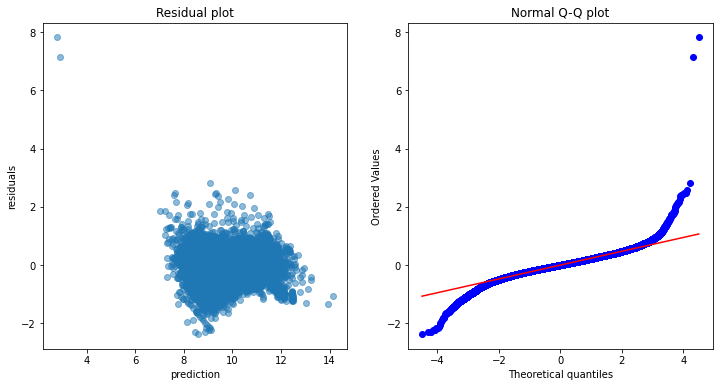

In [46]:
y=df_impute.logged_price
X=df_impute.drop(columns=['price','logged_price'],axis=1)
diagnostic_plot(X,y,fit5)

In [47]:
# interesting!  both have super high mileage , ..  Let's leave these for now, but hold this thought
res=fit5.resid
df_impute.iloc[np.where(res>6)]

,year,city_fuel_economy,daysonmarket,engine_displacement,franchise_dealer,highway_fuel_economy,horsepower,is_new,latitude,longitude,mileage,owner_count,price,savings_amount,seller_rating,model_name,make_name,engine_type,dealer_zip,logged_price
vin,,,,,,,,,,,,,,,,,,,,
KMHH35LE6LU131604,2020,25.0,114,2000.0,True,32.0,161.0,True,35.2449,-114.038,999999.0,1.0,22907.0,0,3.500000,Elantra GT,Hyundai,I4,86409,10.039198
1GCRYDED8LZ312540,2020,16.0,63,5300.0,True,22.0,355.0,True,43.6195,-116.334,1111111.0,1.0,39523.0,0,3.818182,Silverado 1500,Chevrolet,V8,83713,10.584638


In [48]:
df_impute.sort_values(by='mileage').tail()[['mileage','price']]

,mileage,price
vin,,
NM0LS7AN2CT108243,392650.0,6995.0
3GCPKSE77DG374634,397322.0,12995.0
JTHBJ46G982187965,399496.0,6259.0
KMHH35LE6LU131604,999999.0,22907.0
1GCRYDED8LZ312540,1111111.0,39523.0


In [49]:
df_impute=df_impute[df_impute.mileage<500000]

In [50]:
## try using log Transformed version of Price 
lm6 = smf.ols('logged_price~city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_impute)

# Fit the model
fit6 = lm6.fit()

# Print summary statistics of the model's performance
fit6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logged_price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                 7.916e+04
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:41:29   Log-Likelihood:                 2244.2
No. Observations:              207288   AIC:                            -4460.
Df Residuals:                  207274   BIC:                            -4317.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    9.3669      0.009   1012.805      0.000       9.349       9.385
franchise_dealer[T.True]     0.0997      0.002     61.291      0.000       0.096       0.103
is_new[T.True]               0.1146      0.002     69.412      0.000       0.111       0.118
city_fuel_economy            0.0206      0.000     99.603      0.000       0.020       0.021
daysonmarket             -7.047e-05   5.06e-06    -13.937      0.000   -8.04e-05   -6.06e-05
engine_displacement      -6.494e-05   8.22e-07    -78.988      0.000   -6.65e-05   -6.33e-05
highway_fuel_economy        -0.0230      0.000   -104.651      0.000      -0.023      -0.023
horsepower                   0.0042   1.18e-05    350.646      0.000       0.004       0.004
latitude                     0.0013      0.000     11.758      0.000       0.001       0.001
longitude                   -0.0006   3.87e-05    -15.729      0.000      -0.001      -0.001
mileage                   -7.29e-06   1.96e-08   -371.105      0.000   -7.33e-06   -7.25e-06
owner_count                 -0.0707      0.001    -73.129      0.000      -0.073      -0.069
savings_amount            3.894e-05   6.26e-07     62.210      0.000    3.77e-05    4.02e-05
seller_rating                0.0432      0.001     41.676      0.000       0.041       0.045
==============================================================================
Omnibus:                    16415.148   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            94397.901
Skew:                          -0.116   Prob(JB):                         0.00
Kurtosis:                       6.298   Cond. No.                     9.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

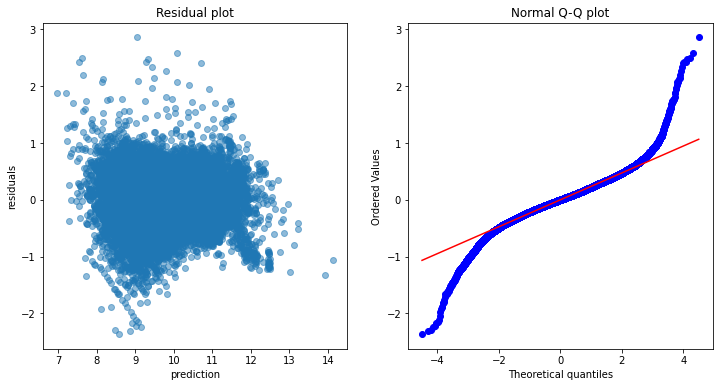

In [51]:
y=df_impute.logged_price
X=df_impute.drop(columns=['price','logged_price'],axis=1)
diagnostic_plot(X,y,fit6)

### Step #7   Bring in Categorical variables & Feature Engineering

In [53]:
## Let's start off by only using numerical vals 
cat_cols=df.dtypes[df.dtypes=='object'].index
df_cat=df[cat_cols]

for i in df_cat.columns:
    print(i)

dealer_zip
engine_cylinders
engine_type
franchise_make
fuel_type
has_accidents
is_oemcpo
length
listed_date
make_name
maximum_seating
model_name
power
salvage
torque
transmission
wheel_system
wheel_system_display
wheelbase
width


#### Some Basic Feature Engineering

In [54]:
### Let's create torque feature that makes more sense for our model .. 
df_cat.torque.value_counts().head()

383 lb-ft @ 4,100 RPM    6627
400 lb-ft @ 4,500 RPM    4976
410 lb-ft @ 3,950 RPM    4182
148 lb-ft @ 200 RPM      4056
132 lb-ft @ 4,500 RPM    3960
Name: torque, dtype: int64

In [55]:
def normalize_torque(x):
    try:
        lb_ft=int(x.split()[0])
        rpm=int(x.split()[3].replace(',',''))
        return lb_ft/rpm
    except:
        return np.nan   

In [56]:
df_impute=df_impute.join(df['torque'])

In [57]:
df_impute['torque_norm']=df_impute['torque'].apply(normalize_torque)
df_impute['torque_norm']=df_impute['torque_norm'].fillna(df_impute['torque_norm'].median())

In [94]:
df_comb=df_impute.join(df[['maximum_seating']])

In [59]:
df_comb.maximum_seating.value_counts(dropna=False)

5 seats     135999
7 seats      22310
6 seats      17621
8 seats      14851
NaN           6047
4 seats       5934
2 seats       2467
3 seats       1369
15 seats       333
9 seats        243
10 seats        42
--              39
12 seats        33
Name: maximum_seating, dtype: int64

In [95]:
df_comb.maximum_seating=df_comb.maximum_seating.replace('--',None)
df_comb.maximum_seating=df_comb.maximum_seating.fillna('5 seats')

df_comb.maximum_seating=df_comb.maximum_seating.apply(lambda x: x.split()[0]).astype(int)

In [61]:
# testing engineered features
lm6 = smf.ols('logged_price~torque_norm+maximum_seating+city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_comb)

# Fit the model
fit6 = lm6.fit()

# Print summary statistics of the model's performance
fit6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logged_price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                 6.917e+04
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:41:30   Log-Likelihood:                 2947.7
No. Observations:              207288   AIC:                            -5863.
Df Residuals:                  207272   BIC:                            -5700.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    9.2472      0.010    947.259      0.000       9.228       9.266
franchise_dealer[T.True]     0.0978      0.002     60.329      0.000       0.095       0.101
is_new[T.True]               0.1148      0.002     69.732      0.000       0.112       0.118
torque_norm                  0.0996      0.005     19.203      0.000       0.089       0.110
maximum_seating              0.0165      0.000     32.923      0.000       0.015       0.017
city_fuel_economy            0.0202      0.000     97.625      0.000       0.020       0.021
daysonmarket             -7.166e-05   5.04e-06    -14.208      0.000   -8.15e-05   -6.18e-05
engine_displacement      -6.527e-05   8.42e-07    -77.506      0.000   -6.69e-05   -6.36e-05
highway_fuel_economy        -0.0217      0.000    -97.720      0.000      -0.022      -0.021
horsepower                   0.0041   1.19e-05    346.596      0.000       0.004       0.004
latitude                     0.0013      0.000     12.144      0.000       0.001       0.002
longitude                   -0.0006   3.85e-05    -15.424      0.000      -0.001      -0.001
mileage                  -7.306e-06   1.96e-08   -372.543      0.000   -7.34e-06   -7.27e-06
owner_count                 -0.0679      0.001    -70.120      0.000      -0.070      -0.066
savings_amount            3.971e-05   6.25e-07     63.572      0.000    3.85e-05    4.09e-05
seller_rating                0.0430      0.001     41.590      0.000       0.041       0.045
==============================================================================
Omnibus:                    16683.450   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           100357.906
Skew:                          -0.087   Prob(JB):                         0.00
Kurtosis:                       6.404   Cond. No.                     9.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Create Dummy Variables


In [62]:
sorted(df_comb['make_name'].unique())[:5]

['Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'BMW']

In [63]:
### Note: the dummy variable trap

In [64]:
df_make_dummies=pd.get_dummies(df_comb.make_name,drop_first=True)  #Avoid the dummy Variable Trap (with drop_first)
df_make_dummies.head()

,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Buick,Cadillac,Chevrolet,Chrysler,Dodge,FIAT,Ferrari,Fisker,Ford,GMC,Genesis,Honda,Hummer,Hyundai,INFINITI,Isuzu,Jaguar,Jeep,Kia,Lamborghini,Land Rover,Lexus,Lincoln,Lotus,MINI,Maserati,Maybach,Mazda,McLaren,Mercedes-Benz,Mercury,Mitsubishi,Nissan,Oldsmobile,Plymouth,Pontiac,Porsche,RAM,Rolls-Royce,SRT,Saab,Saturn,Scion,Subaru,Suzuki,Toyota,Volkswagen,Volvo,smart
vin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1GAZG1FGXF1182508,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
JTJBM7FX0J5202882,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1FM5K8HC3LGA01518,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
YV4BR0DL3M1675891,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
JM3KFBEY5K0697516,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
# Testing with Dummy Make variable!  -- > .869
lm7 = smf.ols('logged_price~make_name+maximum_seating+torque_norm+city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_comb)

# Fit the model
fit7 = lm7.fit()

# Print summary statistics of the model's performance
fit7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logged_price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 1.984e+04
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:41:32   Log-Likelihood:                 27440.
No. Observations:              207288   AIC:                        -5.474e+04
Df Residuals:                  207218   BIC:                        -5.402e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      9.4797      0.010    939.139      0.000       9.460       9.499
make_name[T.Alfa Romeo]       -0.0193      0.012     -1.549      0.121      -0.044       0.005
make_name[T.Aston Martin]      0.6093      0.029     20.750      0.000       0.552       0.667
make_name[T.Audi]              0.1315      0.006     21.201      0.000       0.119       0.144
make_name[T.BMW]               0.0861      0.006     15.012      0.000       0.075       0.097
make_name[T.Bentley]           0.2724      0.027     10.108      0.000       0.220       0.325
make_name[T.Buick]            -0.1522      0.006    -27.343      0.000      -0.163      -0.141
make_name[T.Cadillac]          0.0311      0.006      5.340      0.000       0.020       0.042
make_name[T.Chevrolet]        -0.1802      0.005    -38.009      0.000      -0.189      -0.171
make_name[T.Chrysler]         -0.2525      0.006    -40.798      0.000      -0.265      -0.240
make_name[T.Dodge]            -0.3402      0.005    -64.876      0.000      -0.351      -0.330
make_name[T.FIAT]             -0.2247      0.016    -13.722      0.000      -0.257      -0.193
make_name[T.Ferrari]           0.5259      0.029     18.448      0.000       0.470       0.582
make_name[T.Fisker]           -0.2118      0.123     -1.728      0.084      -0.452       0.028
make_name[T.Ford]             -0.2167      0.005    -46.320      0.000      -0.226      -0.208
make_name[T.GMC]              -0.1172      0.005    -22.320      0.000      -0.127      -0.107
make_name[T.Genesis]           0.0007      0.014      0.052      0.959      -0.026       0.028
make_name[T.Honda]            -0.0920      0.005    -18.961      0.000      -0.101      -0.082
make_name[T.Hummer]            0.1768      0.048      3.710      0.000       0.083       0.270
make_name[T.Hyundai]          -0.1511      0.005    -29.910      0.000      -0.161      -0.141
make_name[T.INFINITI]         -0.0696      0.006    -10.792      0.000      -0.082      -0.057
make_name[T.Isuzu]            -0.6982      0.071     -9.855      0.000      -0.837      -0.559
make_name[T.Jaguar]            0.0939      0.010      9.436      0.000       0.074       0.113
make_name[T.Jeep]             -0.0672      0.005    -13.617      0.000      -0.077      -0.058
make_name[T.Kia]              -0.2320      0.005    -45.071      0.000      -0.242      -0.222
make_name[T.Lamborghini]       0.6500      0.046     14.183      0.000       0.560       0.740
make_name[T.Land Rover]        0.1869      0.008     23.573      0.000       0.171       0.202
make_name[T.Lexus]             0.0963      0.006     16.177      0.000       0.085       0.108
make_name[T.Lincoln]          -0.0517      0.006     -8.218      0.000      -0.064      -0.039
make_name[T.Lotus]             0.5964      

### Exercise 
Using your domain knowledge of cars, pick the most valuable categorical features to add to the model. Try as many as you think make sense. 

* Iteratively test the categorical features

*Challenge* : create a function to iteratively test the addition of a new categorical variables.   

*Hint* : You may want to reduce the different types of unique values within a column in order to control the dimensionality.  For example:

```
common_zips=df_comb.dealer_zip.value_counts().index[df_comb.dealer_zip.value_counts()>100]
df_comb['zips_clean']=df_comb.dealer_zip.apply(lambda x:x if x in common_zips else 'Other')
```

In [36]:
# TBD .. 

# Regression with sklearn
Statsmodels has decent functionality for linear models, and is great for statistical summaries. But, scikit-learn has more modeling options for all sorts of algorithms as well as data preparation and is growing every day, so we will generally be working with that from here on.

### Regression with sklearn
Before we jump into some of the additional features of sklearn, let's try to repeat what we have so far using sklearn's built in **LinearRegression**.

1st we will have to use some functions to add our categorical dummy variables

In [73]:
df_dummies= pd.get_dummies(df_comb[['transmission','model_name','make_name','engine_type','zips_clean','wheel_system','fuel_type','has_accidents']],drop_first=True)

### combine with the previous
df_cat_num=df_comb.drop(['torque','dealer_zip','transmission','model_name','make_name','engine_type','zips_clean','wheel_system','fuel_type','has_accidents'],1).join(df_dummies)

/var/folders/jn/625fnnbs1jg77y82ld96q65w0000gn/T/ipykernel_1943/3202041944.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_cat_num=df_comb.drop(['torque','dealer_zip','transmission','model_name','make_name','engine_type','zips_clean','wheel_system','fuel_type','has_accidents'],1).join(df_dummies)


In [74]:
from sklearn.model_selection import train_test_split

X=df_cat_num.drop(columns=['price','logged_price'],axis=1)
y=df_cat_num.logged_price


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
# Partition remaining data into train/validation for 60, 20, 20 divide
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 123)


### Big Machine Learning Idea #1 :  Cross Validation 

The more complex a model is, the more likely it is to overfit, because it learned too much detail in training. This complexity can mean that there are a lot of features, multicollinear features, that we’re using polynomial terms when we don’t need to, etc. One way to correct for overfitting is to adjust for these concerns. Strategies for algorithms other than linear regression might be somewhat different, but they will always aim to reduce complexity.

Let's compare the train & validation scores   (we won't want to use test set until the very end) 

<img src="https://miro.medium.com/max/948/1*4G__SV580CxFj78o9yUXuQ.png" />

In [102]:
# Fit the model to the full dataset
lr = LinearRegression()
lr.fit(X_train, y_train)

# Print out the R^2 for the model for the train data
print('Train R^2: {:6.3f}'.format(lr.score(X_train.values,y_train.values)))

# Print out the R^2 for the model for test data
print('Val R^2: {:6.3f}'.format(lr.score(X_val.values,y_val.values)))

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Train R^2:  0.934
Val R^2: -28919262858.403


/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
### Whoa! , Let's back up & check our features iteratively 

In [133]:
### Let's keep our indices so we can reuse them,

train_indices=X_train.index
val_indices=X_val.index
test_indices = X_test.index

# look at indices
print(train_indices)

Index(['2C4RDGCG7KR647064', 'JM3KFACM5L0862475', '2T1BURHE4HC768924',
       'W1KZF8KB1LA759232', '3GTU9DETXLG290281', '2C3CDZGG8KH759989',
       '3FADP4EJ2KM130860', 'WA1BNAFY4L2089135', '1N6ED0EB6LN710996',
       'MAJ6S3JL4LC389958',
       ...
       '2G61M5S30K9123886', '1FTEX1EP3LFC18478', '1FTEW1CP3JKF71118',
       '5N1AT2MV4LC798210', '3N1AB7AP3HY347992', '3LN6L5A95LR617096',
       '5FNRL3H49AB011265', '2C3CDXHG4GH297473', '2C4RDGCG5KR558951',
       '3N1AB8CV3LY222744'],
      dtype='object', name='vin', length=124372)


In [146]:
cats_to_test=['make_name','engine_type','zips_clean','transmission','wheel_system','fuel_type','has_accidents',
              'model_name']

In [147]:
df_cat_num=df_comb.drop(columns=['torque','dealer_zip','transmission','model_name','make_name','engine_type','zips_clean','wheel_system','fuel_type','has_accidents'],axis=1)

for col in cats_to_test:
    dummies=pd.get_dummies(df_comb[col],drop_first=True)
    df_cat_num=df_cat_num.join(dummies,lsuffix=col)
    X=df_cat_num.drop(columns=['price','logged_price'],axis=1)
    y=df_cat_num.logged_price

    X_train, X_val, X_test = X.loc[train_indices],X.loc[val_indices],X.loc[test_indices]
    y_train, y_val, y_test = y.loc[train_indices],y.loc[val_indices],y.loc[test_indices]
    
    # Fit the model to the full dataset
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    print(col)
    # Print out the R^2 for the model for the train data
    print('Train R^2: {:6.3f}'.format(lr.score(X_train,y_train)))

    # Print out the R^2 for the model for test data
    print('Val R^2: {:6.3f}'.format(lr.score(X_val,y_val)))
    print('\n')

make_name
Train R^2:  0.892
Val R^2:  0.891


engine_type
Train R^2:  0.898
Val R^2:  0.897


zips_clean
Train R^2:  0.898
Val R^2:  0.897


transmission
Train R^2:  0.898
Val R^2:  0.897


wheel_system
Train R^2:  0.902
Val R^2:  0.901


fuel_type
Train R^2:  0.902
Val R^2:  0.901




/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'str']. An error will be raised in 1.2.
  warnings.warn(


has_accidents


/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'str']. An error will be raised in 1.2.
  warnings.warn(


Train R^2:  0.903


/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'str']. An error will be raised in 1.2.
  warnings.warn(


Val R^2:  0.901




/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'str']. An error will be raised in 1.2.
  warnings.warn(


model_name


/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'str']. An error will be raised in 1.2.
  warnings.warn(


Train R^2:  0.934


/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'str']. An error will be raised in 1.2.
  warnings.warn(


Val R^2: -415194133.610




In [163]:
# some of these counts are really low ..  
# Let's leave out model_name .. 
df_comb[['make_name','model_name','engine_type','price']].groupby(['make_name','model_name','engine_type']).count()

price
make_name model_name       engine_type       
Acura     ILX              I4             173
          ILX Hybrid       I4 Hybrid        1
          MDX              V6             863
          MDX Hybrid Sport V6 Hybrid       13
          NSX              V6               3
...                                       ...
Volvo     XC90             I4             354
                           I5               8
                           I6              31
                           V8               4
smart     fortwo           I3              37

[1233 rows x 1 columns]

#### Repeat Regression with KFold

In [ ]:
# dropping the model_name
df_dummies= pd.get_dummies(df_comb[['transmission','make_name','engine_type','zips_clean','wheel_system','fuel_type','has_accidents']],drop_first=True)
df_cat_num=df_comb.drop(['torque','dealer_zip','transmission','model_name','make_name','engine_type','zips_clean','wheel_system','fuel_type','has_accidents'],1).join(df_dummies)

X=df_cat_num.drop(columns=['price','logged_price'],axis=1)
y=df_cat_num.logged_price

# resplit,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

# Define model
lr_4kfold = LinearRegression()

kf = KFold(n_splits=3, # number of folds
     shuffle=True, # randomizes order of rows before split
     random_state = 42) # using same number in future code/ rerunning allows us to replicate the split 

#to see all validation scores
lr_cv = cross_val_score(lr_4kfold, X_train, y_train, # estimator, features, target
     cv= kf, # folds created above; could also just use a number 
     scoring='r2') # scoring metric
print(lr_cv)

# to print the mean score with standard deviation, rounded to 2 decimals
print(np.round(np.mean(lr_cv), 2), "+-", np.round(np.std(lr_cv),2))

### Final Interpretative Model

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 123)

lr = LinearRegression()
lr.fit(X_train, y_train)

# Print out the R^2 for the model for the train data
print('Train R^2: {:6.3f}'.format(lr.score(X_train,y_train)))

# Print out the R^2 for the model for test data
print('Val R^2: {:6.3f}'.format(lr.score(X_val,y_val)))

Train R^2:  0.903
Val R^2:  0.901


In [177]:
### Feature Interpretation

feat_df=pd.DataFrame({'coef':lr.coef_,'features':X.columns,'abs_val_coef':np.abs(lr.coef_),'exp_coef':np.exp(lr.coef_)}).sort_values(by='abs_val_coef')
feat_df.tail(20)

,coef,features,abs_val_coef,exp_coef
67,-0.400747,make_name_Subaru,0.400747,0.669819
88,-0.409929,engine_type_V6,0.409929,0.663697
84,-0.410177,engine_type_I6,0.410177,0.663533
54,-0.412697,make_name_Mercury,0.412697,0.661863
97,-0.413343,engine_type_W12 Flex Fuel Vehicle,0.413343,0.661435
65,-0.483077,make_name_Saturn,0.483077,0.616883
57,-0.500744,make_name_Oldsmobile,0.500744,0.606080
82,-0.525275,engine_type_I5,0.525275,0.591393
93,-0.525819,engine_type_V8,0.525819,0.591071
87,-0.566696,engine_type_V12,0.566696,0.567397


#### Feature Interpretation

* We can expect a 308% increase in price for Rolls-Royce (compared with 'AM General') 
* We can expect a 286% increase in price for Ferrari (compared with 'AM General') 
* We can expect a .41% decrease in price for engine_type_W12 (compared with 'H4' engine_type) 

### Final Check of all Linear Regression Assumptions:

#### Classical Assumptions of Ordinary Least Squares

1. Regression is linear in parameters & correctly specified
2. The error terms are normally distributed and zero population mean
3. The error term has constant variance $Var({\epsilon_i})={\sigma^2}$ for every i (no heteroskedasticity)
4. Errors are uncorrelated across observations: $cov({\epsilon_i},{\epsilon_j})=0$ for two observations i and j (no serial correlation)
5. No independent variable is a perfect linear function of any other independent variable (no perfect multi-collinearity)

#### Assumption #1 : Regression is linear in parameters & correctly specified

Examples :    
 (Good):  $ Y= {\beta_0}+ {\beta_1}X_1+{\beta_2}X_2 +{\epsilon}$   
 (Bad): $ Y= {\beta_0}+ e^{\beta_1}X^{\beta_2}$

#### Assumption #2 : 

Residuals ( ${e_i} = Y_i-\hat{Y}_i$ ) should be normally distributed with zero mean: 



We can check this assumption as follows by plotting our residuals vs $\hat{Y}$:

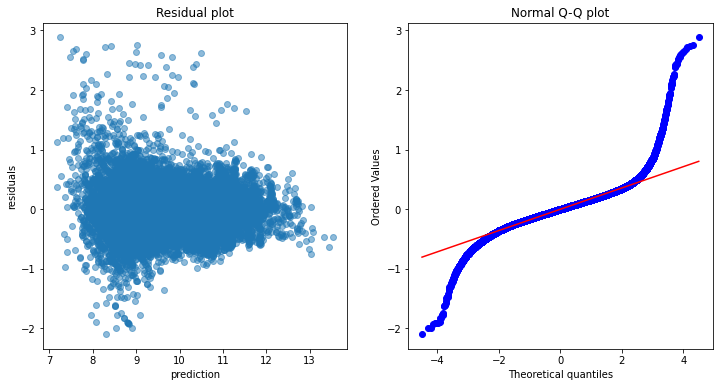

In [195]:
diagnostic_plot(X,y,lr)

#### Assumption #3: 

The error term must have constant variance. Here we see signs of heteroskedasticity.
However, the rule of thumb is: OLS regression isn't too impacted by heteroscedasticity as long as the maximum variance is not greater than 4 times the minimum variance (as in this case).  If the residual variance of your model exceeds this range, we can opt for a Weighted Lease Squares model: http://statsmodels.sourceforge.net/0.6.0/examples/notebooks/generated/wls.html

In [198]:
df.listed_date.value_counts()

2020-09-03    5813
2020-09-02    5489
2020-09-04    5377
2020-09-05    5110
2020-08-29    4524
              ... 
2015-12-04       1
2017-05-28       1
2018-04-05       1
2018-05-02       1
2018-10-10       1
Name: listed_date, Length: 1054, dtype: int64

####  Assumption 4: 

Errors are uncorrelated across observations
To check this assumption, let's plot residuals vs. time


In [218]:
df['listed_date'].dtype

dtype('O')

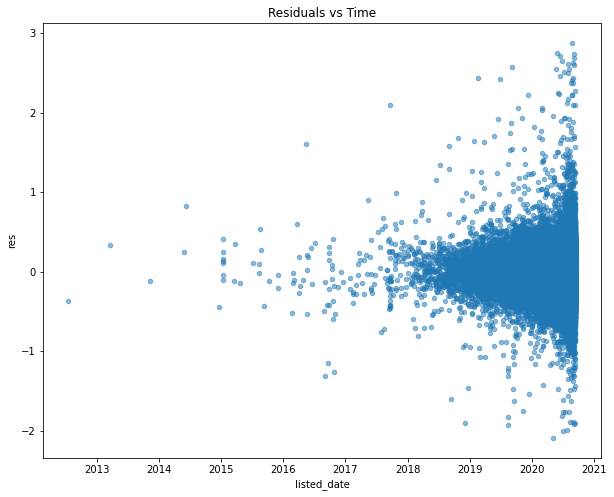

In [226]:
num_4=X.join(df[['listed_date']])
num_4.listed_date=pd.to_datetime(num_4.listed_date)
num_4['res']=y-lr.predict(X)
num_4=num_4[['listed_date','res']].sort_values(by='listed_date')

num_4.plot('listed_date','res',kind='scatter',alpha=.5,figsize=(10,8))
plt.title('Residuals vs Time');

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [ ]:
###  Other Things to Check, Lasso! 

In [234]:
scaler=StandardScaler()

X_train_std=scaler.fit_transform(X_train)
X_val_std=scaler.transform(X_val)


clf = Lasso(alpha=10e-5)
clf.fit(X_train_std, y_train)

# Print out the R^2 for the model for the train data
print('Train R^2: {:6.3f}'.format(clf.score(X_train_std,y_train)))

# Print out the R^2 for the model for test data
print('Val R^2: {:6.3f}'.format(clf.score(X_val_std,y_val)))

Train R^2:  0.903
Val R^2:  0.901


In [235]:
### Feature Interpretation

feat_df=pd.DataFrame({'coef':clf.coef_,'features':X.columns,'abs_val_coef':np.abs(clf.coef_),'exp_coef':np.exp(clf.coef_)}).sort_values(by='abs_val_coef')
feat_df.tail(10)

,coef,features,abs_val_coef,exp_coef
28,-0.051568,make_name_Dodge,0.051568,0.949740
26,-0.053847,make_name_Chevrolet,0.053847,0.947577
93,-0.059392,engine_type_V8,0.059392,0.942338
234,-0.067952,wheel_system_FWD,0.067952,0.934305
32,-0.069101,make_name_Ford,0.069101,0.933233
1,0.108014,city_fuel_economy,0.108014,1.114063
5,-0.127189,highway_fuel_economy,0.127189,0.880567
0,0.190655,year,0.190655,1.210042
10,-0.204249,mileage,0.204249,0.815259
6,0.257329,horsepower,0.257329,1.293470


Feature Interpretation for Lasso Model: 
    
* One unit increase in Horsepower Standard Deviation is associated with a 29.3 % increase in price
* One unit increase in Mileage Standard Deviation is associated with a 81% decrease in price 

##### Pickling for Later
We're going to come back to this dataset!  So let's pickle it away for later...

`sklearn`, `pandas` and `statsmodels` have their own respective methods for "pickling" their objects.

**Pandas:**

To pickle a `pandas.DataFrame` use the [`to_pickle()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_pickle.html) method.  Use this now to pickle your training data `df` now.

In [77]:
# Pickle your pandas dataframe
df_comb.to_pickle('data/df_cat_numb.pkl')

**Statsmodels**

To pickle a statsmodels object us the [`save()`](http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLSResults.save.html#statsmodels.regression.linear_model.OLSResults.save) method.  Use this to pickle your best fit model `fit2` to `survey_sm_model.pkl` now.

In [163]:
# Pickle fit8 to a file 
fit8.save('models/sm_model_8.pkl')

**sklearn**

Pickle an `sklearn` model to the file `survey_sk_model.pkl` using the `sklearn` replacement for pickle `joblib` as seen [here](http://scikit-learn.org/stable/modules/model_persistence.html).

In [78]:
import joblib
joblib.dump(lr, 'models/sklearn_model.pkl')

['models/sklearn_model_1.pkl']

In [ ]:
### OPEN : On Your Own : RandomForestRegressor 
